In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_digits

In [3]:
data = load_digits()

In [5]:
X = data['data']
y = data['target']

In [7]:
X.shape

(1797, 64)

In [15]:
def write_to_file(name, data):
    with open(f'{name}.txt', 'w') as file:
        file.write(str(data))

## 1

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.cross_validation import cross_val_score

In [12]:
tree_clf = DecisionTreeClassifier()

In [13]:
scores = cross_val_score(tree_clf, X, y, cv=10, n_jobs=-1)

In [14]:
scores

array([0.78378378, 0.86338798, 0.85635359, 0.78333333, 0.80446927,
       0.89944134, 0.87709497, 0.83146067, 0.77966102, 0.81818182])

In [16]:
write_to_file('ans1', scores.mean())

## 2

In [17]:
from sklearn.ensemble import BaggingClassifier

In [18]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [19]:
scores_2 = cross_val_score(bag_clf, X, y, cv=10, n_jobs=-1)

In [21]:
scores_2

array([0.87567568, 0.96721311, 0.91160221, 0.94444444, 0.9273743 ,
       0.98882682, 0.97206704, 0.8988764 , 0.8700565 , 0.92045455])

In [22]:
write_to_file('ans2', scores_2.mean())

## 3

In [28]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, max_features=1 / (X.shape[1] ** 0.5))

In [29]:
scores_3 = cross_val_score(bag_clf, X, y, cv=10, n_jobs=-1)

In [30]:
scores_3

array([0.90810811, 0.96174863, 0.94475138, 0.88888889, 0.91620112,
       0.9273743 , 0.96648045, 0.97752809, 0.9039548 , 0.92045455])

In [31]:
scores_3.mean()

0.9315490315616108

In [32]:
write_to_file('ans3', scores_3.mean())

## 4

In [33]:
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt'), n_estimators=100)

In [34]:
scores_4 = cross_val_score(bag_clf, X, y, cv=10, n_jobs=-1)

In [36]:
scores_4.mean()

0.9505571016025749

In [37]:
write_to_file('ans4', scores_4.mean())

## 5

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf_clf = RandomForestClassifier(100, max_features='sqrt')
scores_rf = cross_val_score(rf_clf, X, y, cv=10, n_jobs=-1)
scores_rf.mean()

0.9460820861320715

In [48]:
tree_count_results = {}
for tree_count in [10, 25, 50, 100, 150, 250, 400, 500]:
    clf = RandomForestClassifier(tree_count, max_features='sqrt')
    tree_count_results[tree_count] = cross_val_score(clf, X, y, cv=3, n_jobs=-1).mean()

In [49]:
tree_count_results

{10: 0.904308314452504,
 25: 0.9270742573239606,
 50: 0.9326448014460892,
 100: 0.9376476023490335,
 150: 0.9398707892047032,
 250: 0.9376504313559281,
 400: 0.938757851067999,
 500: 0.941534719861873}

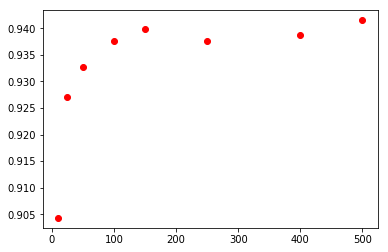

In [56]:
plt.plot(tree_count_results.keys(), tree_count_results.values(), 'ro')

In [57]:
feat_count_results = {}
for feat_count in [2, 4, 5, 8, 12, 20, 35, 50, 64]:
    clf = RandomForestClassifier(150, max_features=feat_count)
    feat_count_results[feat_count] = cross_val_score(clf, X, y, cv=3, n_jobs=-1).mean()

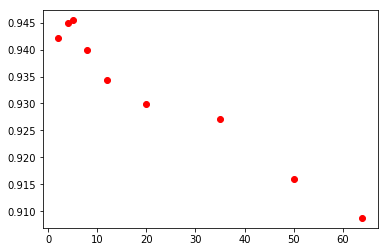

In [58]:
plt.plot(feat_count_results.keys(), feat_count_results.values(), 'ro')

In [63]:
depth_results = {}
for depth in range(3, 15):
    clf = RandomForestClassifier(150, max_features=5, max_depth=depth)
    depth_results[depth] = cross_val_score(clf, X, y, cv=3, n_jobs=-1).mean()

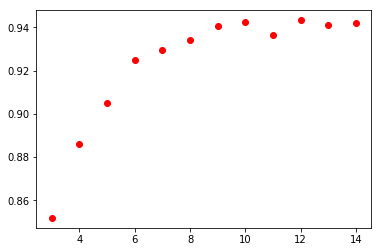

In [64]:
plt.plot(depth_results.keys(), depth_results.values(), 'ro')

In [65]:
write_to_file('ans5', '2 3 4 7')